## Analisis Model Regresi

In [ ]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit
from pandas import DataFrame, read_csv
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
databersih=pd.read_csv('databersih.csv')

C:\Users\Joko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
databersih.head()

,Unnamed: 0,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Employee Identifier,salaries,overtime,retirement,other salaries,total salary,health and dental,other benefits,total benefits,total compensation
0,0,Calendar,2028,7,General City Responsibilities,229259,NaN,792.0,Utd Pub EmpL790 SEIU-Crt Clrks,0000,...,8540990,674.28,0.00,130.91,5.76,680.04,0.00,53.86,184.77,864.81
1,1,Calendar,2028,1,Public Protection,CRT,NaN,792.0,Utd Pub EmpL790 SEIU-Crt Clrks,0000,...,8540990,674.28,0.00,130.91,5.76,680.04,0.00,53.86,184.77,864.81
2,2,Fiscal,2028,1,Public Protection,CRT,NaN,792.0,Utd Pub EmpL790 SEIU-Crt Clrks,0000,...,8540990,674.28,0.00,130.91,5.76,680.04,0.00,53.86,184.77,864.81
3,14,Calendar,2019,7,General City Responsibilities,229975,NaN,21.0,"Prof & Tech Eng, Local 21",5200,...,8554750,45425.24,0.00,8697.41,0.00,45425.24,5961.80,3662.72,28367.11,73792.35
4,113,Calendar,2019,1,Public Protection,SHF,NaN,498.0,Deputy Sheriffs' Assoc (DSA),8300,...,8526939,107001.55,24209.84,38605.39,10059.98,141271.37,14308.44,2318.24,69852.19,211123.56


In [ ]:
print(databersih)

        Unnamed: 0 Year Type  Year  Organization Group Code  \
0                0  Calendar  2028                        7   
1                1  Calendar  2028                        1   
2                2    Fiscal  2028                        1   
3               14  Calendar  2019                        7   
4              113  Calendar  2019                        1   
...            ...       ...   ...                      ...   
280105      835301    Fiscal  2013                        2   
280106      835302    Fiscal  2013                        6   
280107      835303    Fiscal  2013                        5   
280108      835304    Fiscal  2013                        2   
280109      835306    Fiscal  2013                        2   

                             Organization Group Department Code  \
0                 General City Responsibilities          229259   
1                             Public Protection             CRT   
2                             Public Prote

### Scatter Plot antara Gaji Keseluruhan dan Kompensasi Keseluruhan¶

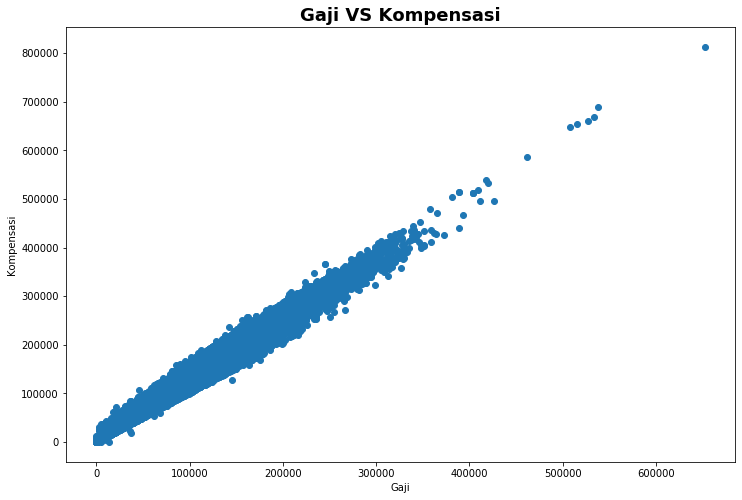

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Menentukan ukuran gambar
plt.figure(figsize=(12,8))
#Ploting
plt.title('Gaji VS Kompensasi', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.scatter(databersih['total salary'], databersih['total compensation'])

plt.xlabel('Gaji')
plt.ylabel('Kompensasi')

plt.savefig('Gaji VS Kompensasi.png', dpi=300)

plt.show()

### Problem Statement:
Berdasarkan hasil plot di atas nampak bahwa Total Kompensasi sangat dipengaruhi oleh Total Gaji, dengan derajat korelasi yaitu 0.991156. Menarik untuk meneliti lebih lanjut, apakah data ini memenuhi persamaan regresi linier atau non linier. Berapa besar keakuratan model, dan model mana yang terbaik. Berikut analisisnya:

### Regresi Linier 

Model Regresi Linier y=b0+b1x
b1 [1.31092117]
b0 4822.817684343172
Koefisien determinasi 0.9857000081758066


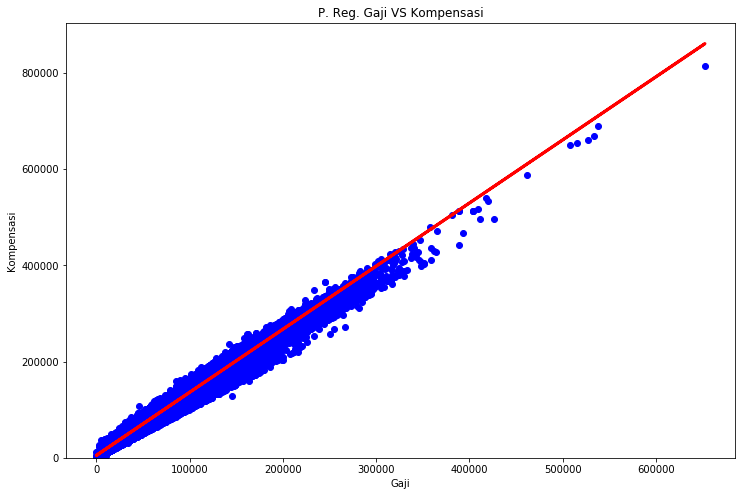

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(12,8))

#Mendefinisikan variabel X dan Y
X=np.array(databersih['total salary']).reshape((-1,1))
Y=np.array(databersih['total compensation'])

#Memecah data x menjadi data latih dan data uji
X_latih=X[:200000]
X_uji=X[-80110:]

#Memecah data y menjadi data latih dan data uji
Y_latih=Y[:200000]
Y_uji=Y[-80110:]

#Membuat model regresi linier
regr = linear_model.LinearRegression()

#Memfiting data latih ke dalam model regresi linier
regr.fit(X_latih,Y_latih)

#Hasil prediksi nilai y berdasarkan model regresi linier
Y_pred= regr.predict(X_latih)

#Mencetak parameter model regresi linier
print('Model Regresi Linier y=b0+b1x')
print('b1', regr.coef_)
print('b0', regr.intercept_)

#Mencetak koefisien determinasi model regresi linier
r_sq=regr.score(X_latih,Y_latih)
print('Koefisien determinasi', r_sq)

#Plot data dan model
plt.scatter(X_latih, Y_latih,  color='blue')
plt.plot(X_latih, Y_pred, color='red', linewidth=3)

plt.title('P. Reg. Gaji VS Kompensasi')
plt.xlabel('Gaji')
plt.ylabel('Kompensasi')
plt.ylim(0,)
plt.savefig('Pers Regresi Gaji VS Kompensasi.png', dpi=300)

plt.show()

### Catatan:
Berdasarkan hasil di atas diperoleh persamaan regresi linear yaitu:
y= 4822.817684343172 + 1.31092117x
dengan 
x adalah variabel gaji keseluruhan
y adalah variabel total kompensasi

dari persamaan ini diketahui bahwa, ketika x=0 maka, seseorang dapat menghasilkan kompensasi sebesar 4822.817684343172 
dan untuk setiap x yang diperoleh maka akan mendapatkan peningkatan sebesar 1.31092117x

Tingkat kepercayaan dari persamaan regresi linier ini adalah 0.9857000081758066 atau 98,57%, artinya tingkat akurasi yang diberikan **sangat tinggi**.


### Regresi Kuadratik

C:\Users\Joko\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Intercept: 
 178.73098279250553
Coefficients: 
 [ 1.49305470e+00 -1.06767145e-06]
Koefisien determinasi: 0.9898724620194947


C:\Users\Joko\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:     total compensation   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.369e+07
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        06:42:40   Log-Likelihood:            -2.8780e+06
No. Observations:              280110   AIC:                         5.756e+06
Df Residuals:                  280107   BIC:                         5.756e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 178.7310    

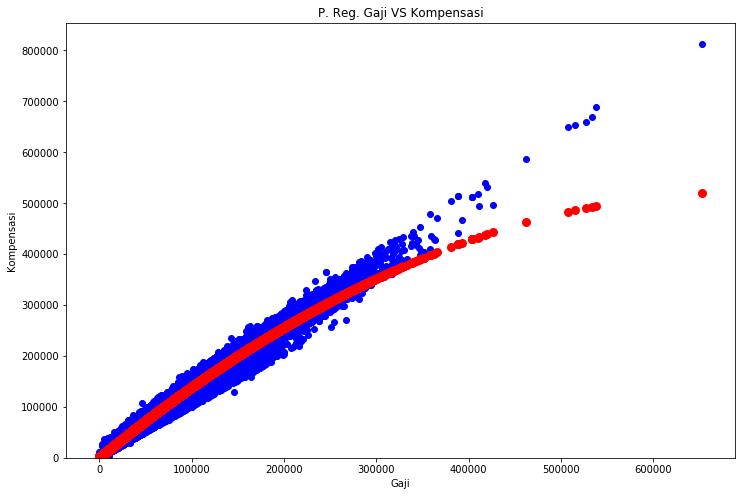

In [ ]:
datareg=databersih[['total compensation','total salary']]
datareg['total salary square']=datareg['total salary']**2
x =datareg[['total salary','total salary square']] 
y =datareg['total compensation']
 
model=LinearRegression()
model.fit(x,y)
model=LinearRegression().fit(x,y)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

a=model.intercept_
b=model.coef_[0]
c=model.coef_[1]

r_sq=model.score(x,y)
print('Koefisien determinasi:', r_sq)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)
X_latih=X_latih[:200000]
X_latih2=X_latih**2
Y_pred2=a+X_latih*b+X_latih2*c

#Plot data dan model
plt.figure(figsize=(12,8))
Y_latih=np.array(Y_latih).reshape((-1,1))
plt.scatter(X_latih, Y_latih,  color='blue')
plt.scatter(X_latih, Y_pred2, color='red', linewidth=3)

plt.title('P. Reg. Gaji VS Kompensasi')
plt.xlabel('Gaji')
plt.ylabel('Kompensasi')
plt.ylim(0,)
plt.savefig('Pers Regresi Gaji VS Kompensasi.png', dpi=300)

plt.show()

### Catatan:
Berdasarkan hasil di atas diperoleh persamaan regresi kuadratik yaitu:
y=  178.7310 + 1.4931x + (-1.068e-06)x^2
dengan 
x adalah variabel gaji keseluruhan
y adalah variabel total kompensasi

Dari persamaan ini diketahui bahwa, ketika x=0 maka, seseorang dapat menghasilkan kompensasi sebesar 178.7310
dan untuk setiap x yang diperoleh maka akan mendapatkan peningkatan sebesar 1.4931x + (-1.068e-06)x^2

Tingkat kepercayaan dari persamaan regresi linier ini adalah 0.990 atau 99%, artinya tingkat akurasi yang diberikan **sangat tinggi**.

Nilai durbin watson pada persamaan ini adalah 1.611, yang berarti tingkat autokorelasi data adalah 1.611, semakin kecil nilai autokorelasi pada persamaan regresi semakin baik.


C:\Users\Joko\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Joko\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Intercept: 
 -1276.589078199977
Coefficients: 
 [ 1.59053572e+00 -2.18193258e-06  3.10664738e-12]
Koefisien determinasi: 0.9904329155889053


C:\Users\Joko\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:     total compensation   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.440e+07
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        06:47:12   Log-Likelihood:            -2.8710e+06
No. Observations:              280110   AIC:                         5.742e+06
Df Residuals:                  280107   BIC:                         5.742e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.139e-05   1

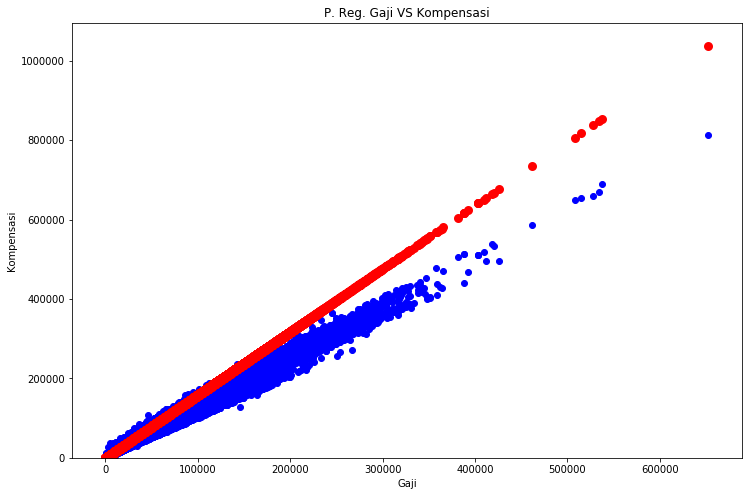

In [ ]:
datareg=databersih[['total compensation','total salary']]
datareg['total salary square']=datareg['total salary']**2
datareg['total salary third']=datareg['total salary']**3
x =datareg[['total salary','total salary square','total salary third']] 
y =datareg['total compensation']

model=LinearRegression()
model.fit(x,y)
model=LinearRegression().fit(x,y)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

a=model.intercept_
b=model.coef_[0]
c=model.coef_[1]
d=model.coef_[2]

r_sq=model.score(x,y)
print('Koefisien determinasi:', r_sq)

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)
X_latih=X_latih[:200000]
X_latih2=X_latih**2
Y_pred2=a+X_latih*b+c*X_latih+d*X_latih

#Plot data dan model
plt.figure(figsize=(12,8))
Y_latih=np.array(Y_latih).reshape((-1,1))
plt.scatter(X_latih, Y_latih,  color='blue')
plt.scatter(X_latih, Y_pred2, color='red', linewidth=3)

plt.title('P. Reg. Gaji VS Kompensasi')
plt.xlabel('Gaji')
plt.ylabel('Kompensasi')
plt.ylim(0,)
plt.savefig('Pers Regresi Gaji VS Kompensasi.png', dpi=300)

plt.show()

### Catatan:
Berdasarkan hasil di atas diperoleh persamaan regresi kuadratik yaitu:
y=   4.139e-05  + 1.5566x + (-1.948e-06)x^2 + 2.675e-12x^3
dengan 
x adalah variabel gaji keseluruhan
y adalah variabel total kompensasi

Dari persamaan ini diketahui bahwa, ketika x=0 maka, seseorang dapat menghasilkan kompensasi sebesar 4.139e-05
dan untuk setiap x yang diperoleh maka akan mendapatkan peningkatan sebesar 1.5566x + (-1.948e-06)x^2 + 2.675e-12x^3

Tingkat kepercayaan dari persamaan regresi linier ini adalah 0.990 atau 99%, artinya tingkat akurasi yang diberikan **sangat tinggi**.

Nilai durbin watson pada persamaan ini adalah 1.580, yang berarti tingkat autokorelasi data adalah 1.580, semakin kecil nilai autokorelasi pada persamaan regresi semakin baik.

### Kesimpulan:
Model dengan regresi terbaik adalah model Regresi Kubik y= 4.139e-05 + 1.5566x + (-1.948e-06)x^2 + 2.675e-12x^3 dengan tingkat kepercayaan 99% dan nilai autokorelasi DW 1.580.
